In [7]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import nltk
nltk.download('punkt')

import sys

sys.path.insert(0, 'nli/')

from plot import PlotResults

[nltk_data] Downloading package punkt to /home/lcur1112/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
from setup import find_checkpoint, setup_vocab, setup_model, load_model, prep_sent

In [82]:
premise     = 'We are living in a yellow submarine'
hypothesis  = 'I want to be, under the sea. In an octopus garden in the shade'

premise = [word.lower() for word in nltk.tokenize.word_tokenize(premise)]
hypothesis = [word.lower() for word in nltk.tokenize.word_tokenize(hypothesis)]

premise, hypothesis


(['we', 'are', 'living', 'in', 'a', 'yellow', 'submarine'],
 ['i',
  'want',
  'to',
  'be',
  ',',
  'under',
  'the',
  'sea',
  '.',
  'in',
  'an',
  'octopus',
  'garden',
  'in',
  'the',
  'shade'])

In [85]:
model_type = 'avg_word_emb'
version = 'version_0'


model, vocab = load_model(model_type, 'store/vocab.pkl', model_type, version)

In [90]:
# check if premise is a list of lists or a list
if isinstance(premise[0], list):
    premise = [prep_sent(sent, vocab) for sent in premise]
else:
    premise = prep_sent(premise, vocab)

premise

(tensor([   46,    22,   611,     9,     8,  2095, 10451,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1]),
 7)

In [87]:
prep_sent([premise, hypothesis], vocab)

TypeError: unhashable type: 'list'

In [ ]:
plots = PlotResults(
    models = ['avg_word_emb', 'uni_lstm', 'bi_lstm'],
    versions = ['version_0', 'version_0', 'version_0'],
    dims = [300, 2048, 4096],
)

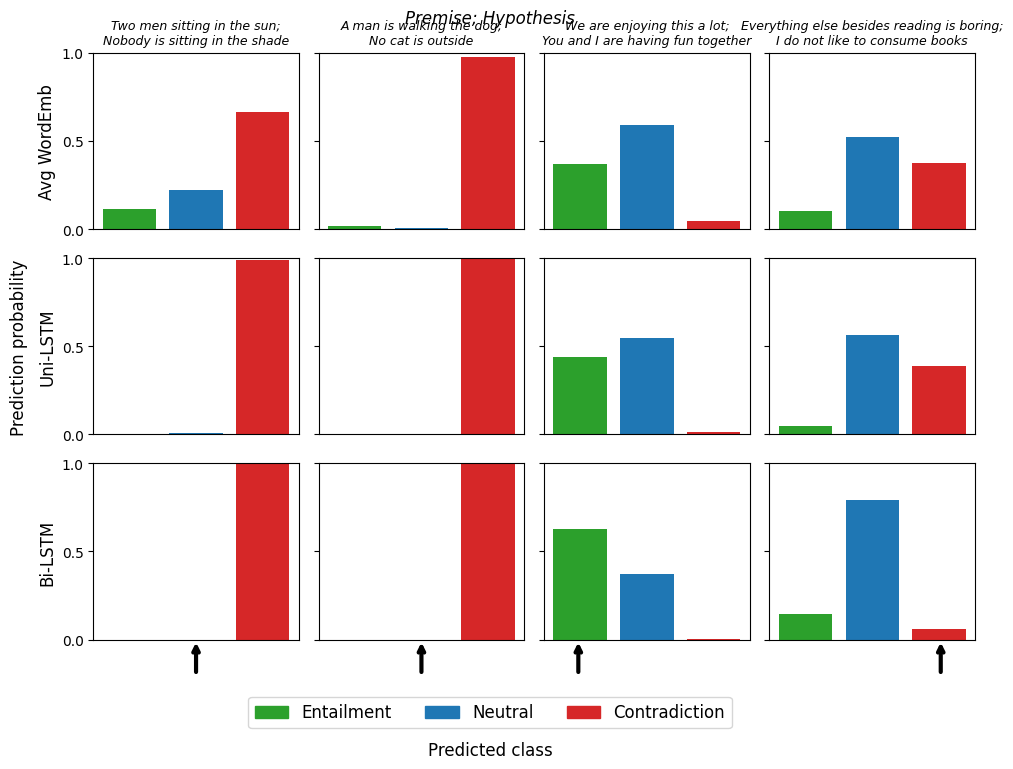

In [72]:
plots.plot_examples().show()

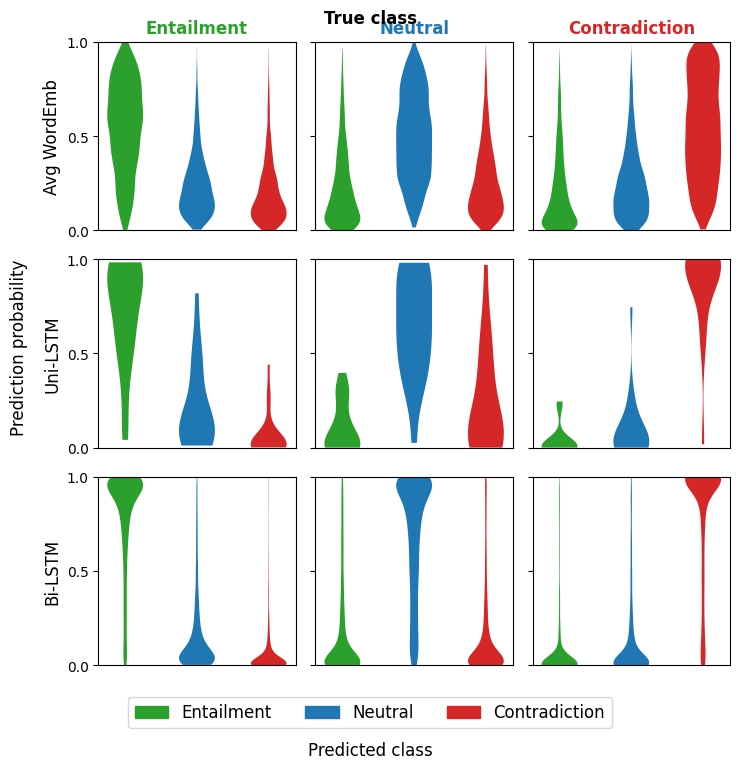

In [73]:
plots.plot_violin().show()

In [71]:
plots.print_results()

,dim,dev,test,micro,macro
Avg WordEmb,300,65.6,65.5,79.5,77.8
Uni-LSTM,2048,81.2,80.9,77.4,76.8
Bi-LSTM,4096,80.3,80.3,79.8,79.0
